In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q "datasets==2.2.2" seqeval
!pip install gradio
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install Pillow==9.0.0

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
Error in fopenReadStream: file not found
Error in findFileFormat: image file not found
Error during processing.
id2label {0: 'others', 1: 'produttore_key', 2: 'produttore_value', 3: 'cliente_key', 4: 'cliente_value', 5: 'unitloc_key', 6: 'unitloc_value', 7: 'operatore_key', 8: 'operatore_value', 9: 'referente_key', 10: 'referente_value', 11: 'cfproduttore_key', 12: 'cfproduttore_value', 13: 'telefono_key', 14: 'telefono_value', 15: 'emailcliente_key', 16: 'emailcliente_value', 17: 'datarichiesta_key', 18: 'datarichiesta_value', 19: 'orariorichiesta_key', 20: 'orariorichiesta_value', 21: 'emailproduttore_key', 22: 'emailproduttore_value', 23: 'mattina_key', 24: 'mattina_value', 25: 'pomeriggio_key', 26: 'pomeriggio_value', 27: 'cer_key', 28: 'cer_value', 29: 'descrizione_key', 30: 'descrizione_value', 31: 'sf_key', 32: 'sf_value', 33: 'classpericolo_key', 34: 'classpericolo_value', 35: 'destino_key', 36: 'destino_value', 37: 

/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


json_df [{'TEXT': 'af', 'LABEL': 'yellow'}, {'TEXT': 'EUROCORPORATION', 'LABEL': 'yellow'}, {'TEXT': 'CONSULENZA', 'LABEL': 'yellow'}, {'TEXT': 'E', 'LABEL': 'yellow'}, {'TEXT': 'GESTIONE', 'LABEL': 'yellow'}, {'TEXT': 'RIFLUTL', 'LABEL': 'yellow'}, {'TEXT': 'PER', 'LABEL': 'yellow'}, {'TEXT': 'UFFICIO', 'LABEL': 'yellow'}, {'TEXT': 'COMUNE', 'LABEL': 'red'}, {'TEXT': 'DI', 'LABEL': 'red'}, {'TEXT': 'PISTOIA', 'LABEL': 'red'}, {'TEXT': 'PRODUTTORE', 'LABEL': 'blue'}, {'TEXT': 'COMUNE', 'LABEL': 'red'}, {'TEXT': 'DI', 'LABEL': 'red'}, {'TEXT': 'PISTOIA', 'LABEL': 'red'}, {'TEXT': 'CLIENTE', 'LABEL': 'blue'}, {'TEXT': 'Via', 'LABEL': 'red'}, {'TEXT': 'Dino', 'LABEL': 'red'}, {'TEXT': 'Buzzati,', 'LABEL': 'red'}, {'TEXT': '1', 'LABEL': 'red'}, {'TEXT': '51100', 'LABEL': 'red'}, {'TEXT': 'PISTOIA', 'LABEL': 'red'}, {'TEXT': '(PT)', 'LABEL': 'red'}, {'TEXT': 'Francesca', 'LABEL': 'red'}, {'TEXT': 'Buffolino', 'LABEL': 'red'}, {'TEXT': '-', 'LABEL': 'red'}, {'TEXT': 'Mob.', 'LABEL': 'red'}, 

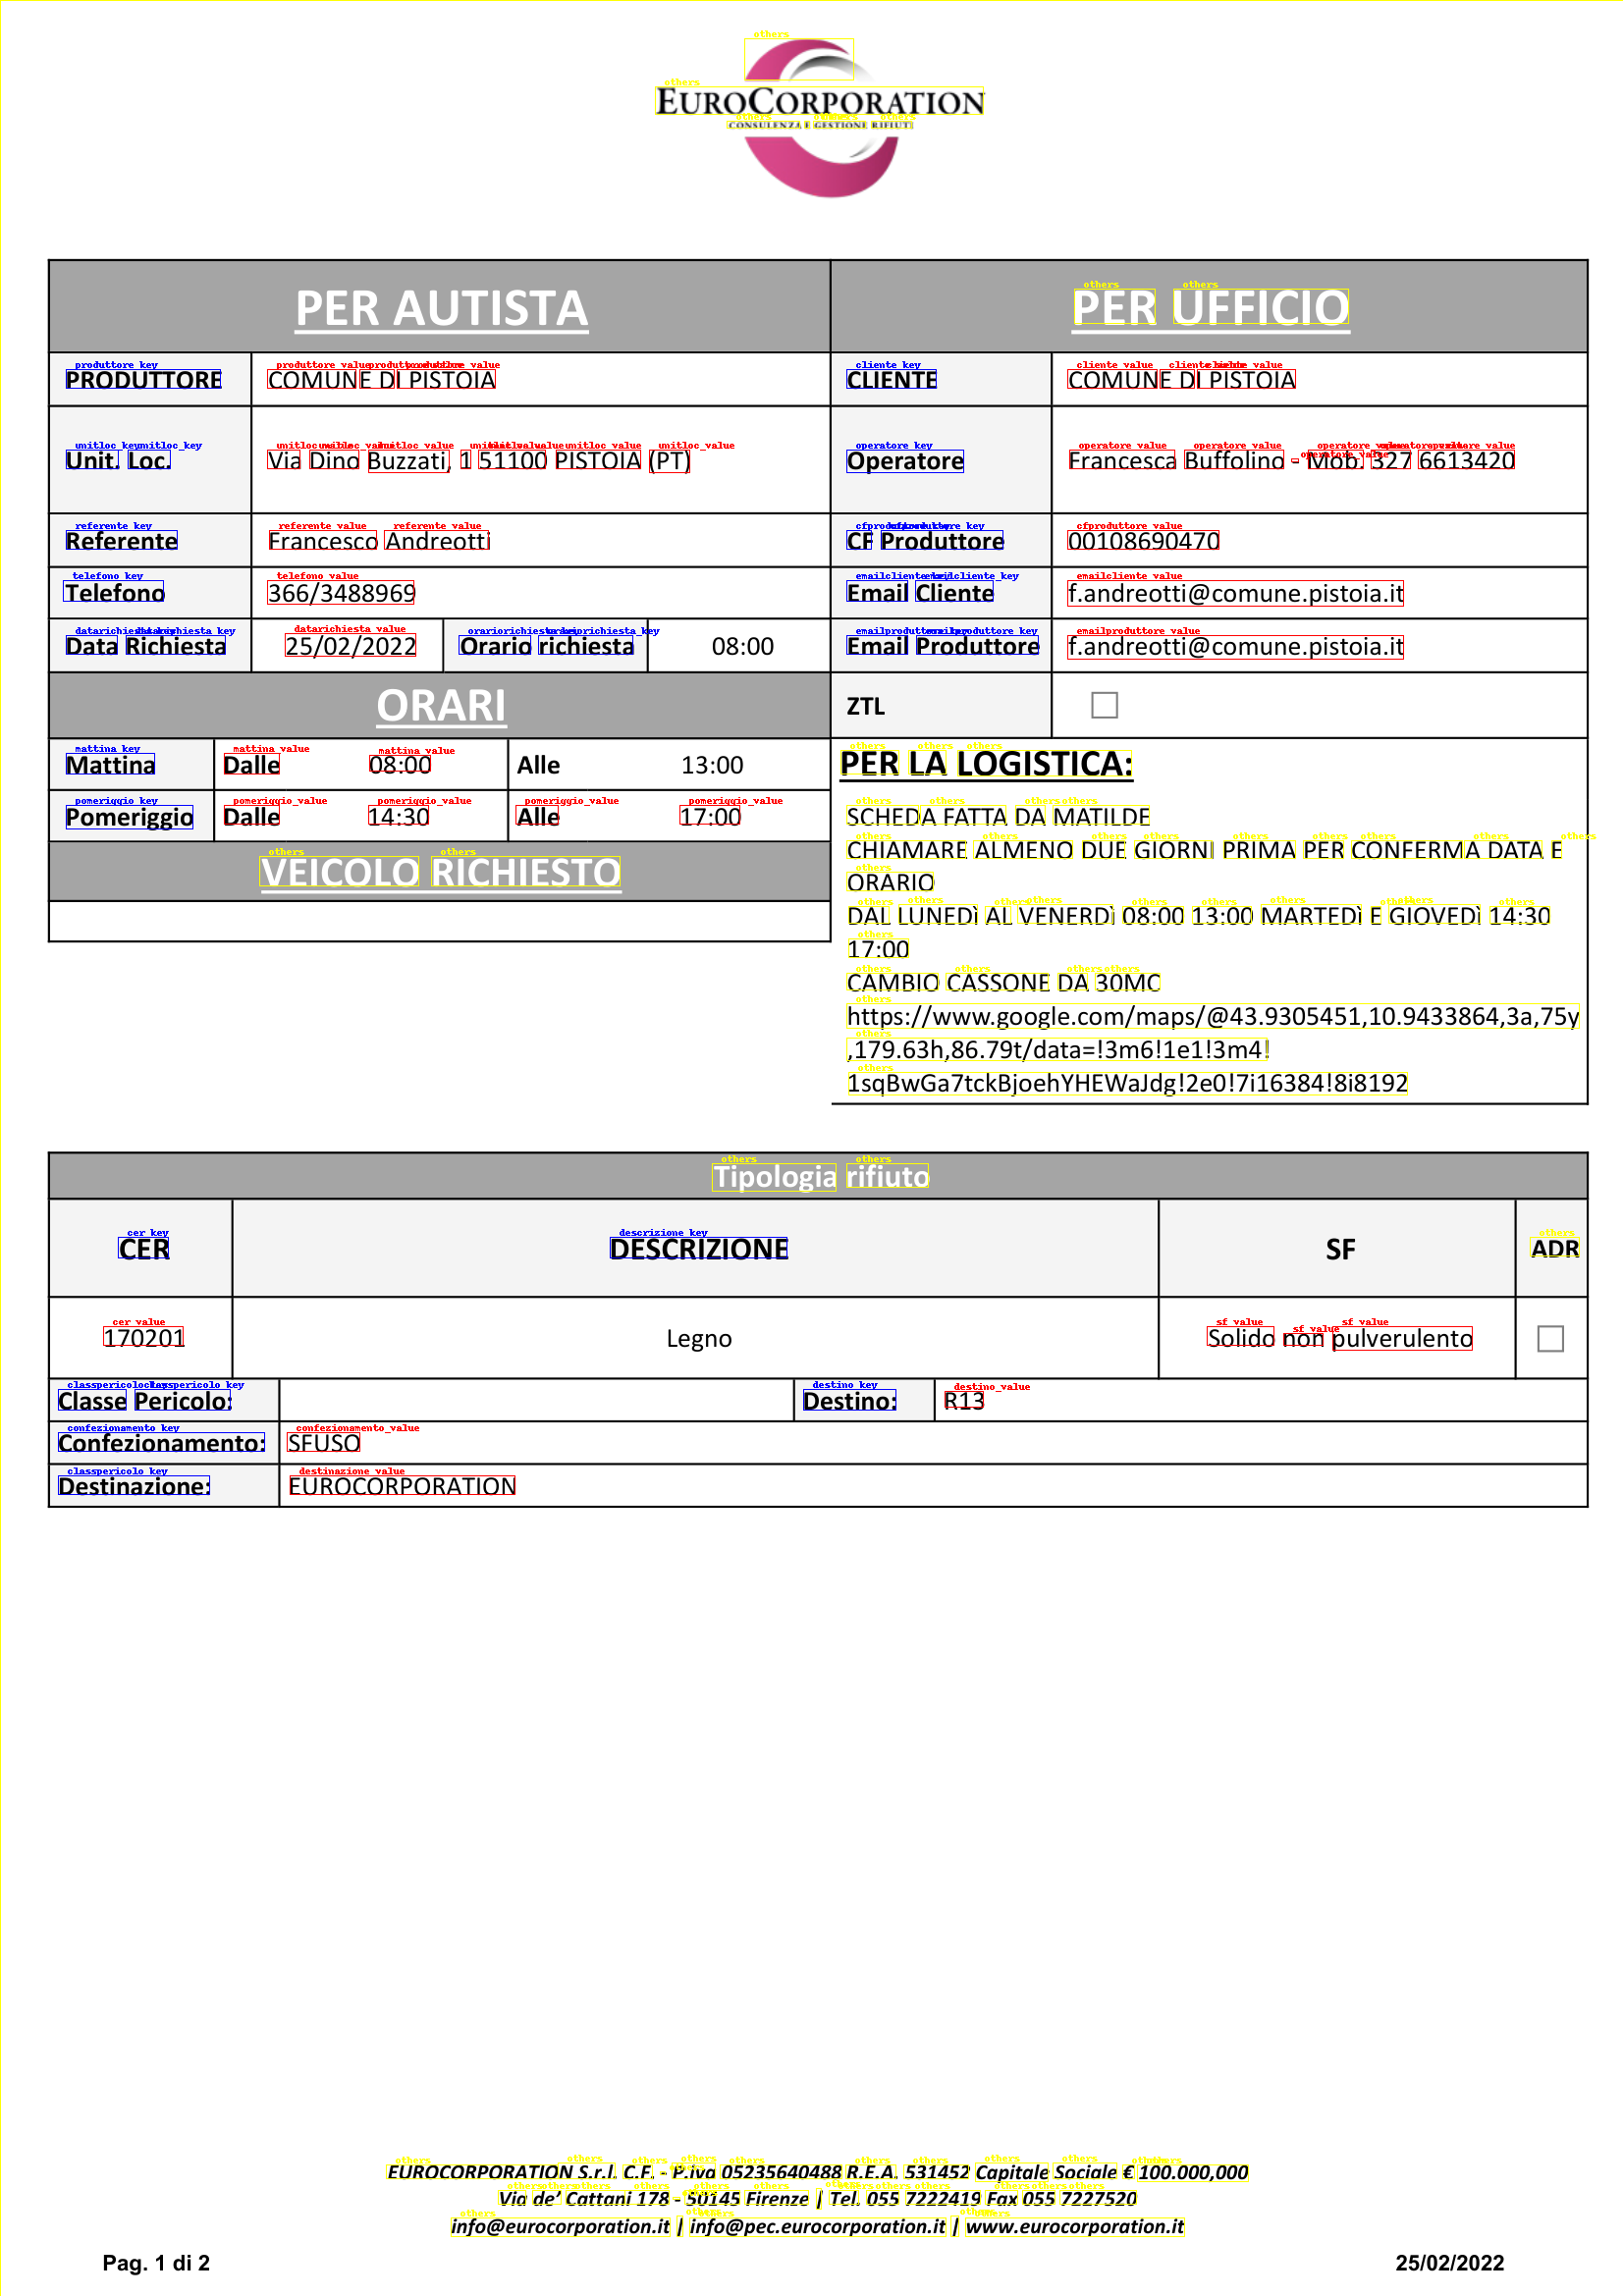

In [23]:
!tesseract — version
import os

# import gradio as gr
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import PIL
from itertools import groupby
from transformers import AutoModelForTokenClassification
from datasets.features import ClassLabel
from transformers import AutoProcessor
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
import torch
from datasets import load_metric
# from PIL import Image, ImageDraw, ImageFont
from transformers import LayoutLMv3ForTokenClassification,LayoutLMv3FeatureExtractor
from transformers.data.data_collator import default_data_collator


from transformers import AutoModelForTokenClassification
from datasets import load_dataset
from PIL import Image, ImageDraw, ImageFont


# define id2label
id2label={0: 'others', 1: 'produttore_key', 2: 'produttore_value', 3: 'cliente_key', 4: 'cliente_value', 5: 'unitloc_key', 6: 'unitloc_value', 7: 'operatore_key', 8: 'operatore_value', 9: 'referente_key', 10: 'referente_value', 11: 'cfproduttore_key', 12: 'cfproduttore_value', 13: 'telefono_key', 14: 'telefono_value', 15: 'emailcliente_key', 16: 'emailcliente_value', 17: 'datarichiesta_key', 18: 'datarichiesta_value', 19: 'orariorichiesta_key', 20: 'orariorichiesta_value', 21: 'emailproduttore_key', 22: 'emailproduttore_value', 23: 'mattina_key', 24: 'mattina_value', 25: 'pomeriggio_key', 26: 'pomeriggio_value', 27: 'cer_key', 28: 'cer_value', 29: 'descrizione_key', 30: 'descrizione_value', 31: 'sf_key', 32: 'sf_value', 33: 'classpericolo_key', 34: 'classpericolo_value', 35: 'destino_key', 36: 'destino_value', 37: 'confezionamento_key', 38: 'confezionamento_value', 39: 'destinazione_key', 40: 'destinazione_value'}

print('id2label',id2label)


label_ints = np.random.randint(0,len(PIL.ImageColor.colormap.items()),42)
print('id2label.items()',id2label.items())
label_color_pil = [k for k,_ in PIL.ImageColor.colormap.items()]
label_color = [label_color_pil[i] for i in label_ints]
label2color = {}
for k,v in id2label.items():
  if v[:2] == '':
    label2color['o']=label_color[k]
  else:
    label2color[v[2:]]=label_color[k]

processor = AutoProcessor.from_pretrained("/content/drive/Shareddrives/Data Science Team folder-open/model/checkpoint-1000", apply_ocr=True)
model = AutoModelForTokenClassification.from_pretrained("/content/drive/Shareddrives/Data Science Team folder-open/model/checkpoint-1000")


def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]


def iob_to_label(label):
    return label

#We store the extracted 
test_words = []
test_boxes = []

def process_image(image):

    print(type(image))
    width, height = image.size

    feature_extractor = LayoutLMv3FeatureExtractor(apply_ocr=True)
    encoding_feature_extractor = feature_extractor(image, return_tensors="pt")
    words, boxes = encoding_feature_extractor.words, encoding_feature_extractor.boxes

    custom_config = r'--oem 3 --psm 6'
    # encode
    encoding = processor(image, truncation=True, return_offsets_mapping=True, return_tensors="pt")
    offset_mapping = encoding.pop('offset_mapping')

    # forward pass
    outputs = model(**encoding)

    # get predictions
    predictions = outputs.logits.argmax(-1).squeeze().tolist()
    token_boxes = encoding.bbox.squeeze().tolist()



    # only keep non-subword predictions
    is_subword = np.array(offset_mapping.squeeze().tolist())[:,0] != 0
    true_predictions = [id2label[pred] for idx, pred in enumerate(predictions) if not is_subword[idx]]
    true_boxes = [unnormalize_box(box, width, height) for idx, box in enumerate(token_boxes) if not is_subword[idx]]

    true_boxes = true_boxes[1:-1]
    true_predictions = true_predictions[1:-1]

    preds = []
    l_words = []
    bboxes = []

    for i,j in enumerate(true_predictions):

      if j != 'O':
        preds.append(true_predictions[i])
        l_words.append(words[0][i])
        bboxes.append(true_boxes[i])

    return bboxes, preds, l_words, image



def visualize_image(final_bbox, final_preds, l_words, image):

      draw = ImageDraw.Draw(image)
      font = ImageFont.load_default()

      label2color = {
    "others": 'yellow',
    "produttore_key": 'blue',
    "produttore_value": 'red',
    "unitloc_key": 'blue',
    "unitloc_value": 'red',
    "cliente_key": 'blue',
    "cliente_value": 'red',
    "operatore_key": 'blue',
    "operatore_value": 'red',
    "referente_key": 'blue',
    "referente_value": 'red',
    "telefono_key": 'blue',
    "telefono_value": 'red',
    "cfproduttore_key": 'blue',
    "cfproduttore_value": 'red',
    "emailcliente_key": 'blue',
    "emailcliente_value": 'red',
    "datarichiesta_key": 'blue',
    "datarichiesta_value": 'red',
    "orariorichiesta_key": 'blue',
    "orariorichiesta_value":'red',
    "emailproduttore_key": 'blue',
    "emailproduttore_value": 'red',
    "mattina_key": 'blue',
    "mattina_value": 'red',
    "pomeriggio_key": 'blue',
    "pomeriggio_value": 'red',
    "cer_key": 'blue',
    "cer_value": 'red',
    "descrizione_key": 'blue',
    "descrizione_value": 'red',
    "sf_key": 'blue',
    "sf_value": 'red',
    "classpericolo_key": 'blue',
    "destino_key": 'blue',
     "destino_value": 'red',
    "confezionamento_key": 'blue',
    "confezionamento_value": 'red',
    "destinazione_key": 'blue',
    "destinazione_value": 'red'
  }

      l2l = {
    "others": 'yellow',
    "produttore_key": 'blue',
    "produttore_value": 'red',
    "unitloc_key": 'blue',
    "unitloc_value": 'red',
    "cliente_key": 'blue',
    "cliente_value": 'red',
    "operatore_key": 'blue',
    "operatore_value": 'red',
    "referente_key": 'blue',
    "referente_value": 'red',
    "telefono_key": 'blue',
    "telefono_value": 'red',
    "cfproduttore_key": 'blue',
    "cfproduttore_value": 'red',
    "emailcliente_key": 'blue',
    "emailcliente_value": 'red',
    "datarichiesta_key": 'blue',
    "datarichiesta_value": 'red',
    "orariorichiesta_key": 'blue',
    "orariorichiesta_value":'red',
    "emailproduttore_key": 'blue',
    "emailproduttore_value": 'red',
    "mattina_key": 'blue',
    "mattina_value": 'red',
    "pomeriggio_key": 'blue',
    "pomeriggio_value": 'red',
    "cer_key": 'blue',
    "cer_value": 'red',
    "descrizione_key": 'blue',
    "descrizione_value": 'red',
    "sf_key": 'blue',
    "sf_value": 'red',
    "classpericolo_key": 'blue',
    "destino_key": 'blue',
     "destino_value": 'red',
    "confezionamento_key": 'blue',
    "confezionamento_value": 'red',
    "destinazione_key": 'blue',
    "destinazione_value": 'red'
  }
      f_labels = {
    "others": 'yellow',
    "produttore_key": 'blue',
    "produttore_value": 'red',
    "unitloc_key": 'blue',
    "unitloc_value": 'red',
    "cliente_key": 'blue',
    "cliente_value": 'red',
    "operatore_key": 'blue',
    "operatore_value": 'red',
    "referente_key": 'blue',
    "referente_value": 'red',
    "telefono_key": 'blue',
    "telefono_value": 'red',
    "cfproduttore_key": 'blue',
    "cfproduttore_value": 'red',
    "emailcliente_key": 'blue',
    "emailcliente_value": 'red',
    "datarichiesta_key": 'blue',
    "datarichiesta_value": 'red',
    "orariorichiesta_key": 'blue',
    "orariorichiesta_value":'red',
    "emailproduttore_key": 'blue',
    "emailproduttore_value": 'red',
    "mattina_key": 'blue',
    "mattina_value": 'red',
    "pomeriggio_key": 'blue',
    "pomeriggio_value": 'red',
    "cer_key": 'blue',
    "cer_value": 'red',
    "descrizione_key": 'blue',
    "descrizione_value": 'red',
    "sf_key": 'blue',
    "sf_value": 'red',
    "classpericolo_key": 'blue',
    "destino_key": 'blue',
     "destino_value": 'red',
    "confezionamento_key": 'blue',
    "confezionamento_value": 'red',
    "destinazione_key": 'blue',
    "destinazione_value": 'red'
  }

      json_df = []

      for ix, (prediction, box) in enumerate(zip(final_preds, final_bbox)):
        predicted_label = iob_to_label(prediction).lower()
        draw.rectangle(box, outline=label2color[predicted_label])
        draw.text((box[0]+10, box[1]-10), text=predicted_label, fill=label2color[predicted_label], font=font)

        json_dict = {}
        json_dict['TEXT'] = l_words[ix]
        json_dict['LABEL'] = f_labels[predicted_label]
        
        json_df.append(json_dict)
      print('json_df',json_df)
      return image, json_df



# for prediction, box in zip(true_predictions, true_boxes):
#     predicted_label = iob_to_label(prediction)
#     print(predicted_label)
#     draw.rectangle(box, outline=label2color[predicted_label])
#     draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

# image
def process_form(json_df):

  labels = [x['LABEL'] for x in json_df]
  texts = [x['TEXT'] for x in json_df]
  cmb_list = []
  for i, j in enumerate(labels):
    cmb_list.append([labels[i], texts[i]])

  grouper = lambda l: [[k] + sum((v[1::] for v in vs), []) for k, vs in groupby(l, lambda x: x[0])]

  list_final = grouper(cmb_list)
  lst_final = []
  for x in list_final:
    json_dict = {}
    json_dict[x[0]] = (' ').join(x[1:])
    lst_final.append(json_dict)

  return lst_final

from PIL import Image, ImageDraw, ImageFont
image = Image.open('/content/drive/Shareddrives/Data Science Team folder-open/dataset/test/img_dir/11.jpg')
image = image.convert("RGB")

# gets the bounding boxes, predictions, extracted words and image processed
bbox, preds, words, image = process_image(image)

# returns image and extracted key-value pairs along with title as the output
im, json_data = visualize_image(bbox, preds, words, image)

# process and returns k-v pairs by concatenating relevant strings.
df_main = process_form(json_data)

image

In [25]:
print(len(words),len(bbox),len(preds)) #bbox, preds, words

149 149 149


In [166]:
tracker_label_idx = {}
for i in range(len(preds)):
  if preds[i] == 'others':
    pass
  elif preds[i] in tracker_label_idx:
    tracker_label_idx[preds[i]].append(i)
  else:
    tracker_label_idx[preds[i]] = [i]
tracker_label_idx

{'cer_key': [102],
 'cer_value': [113],
 'cfproduttore_key': [35, 36],
 'cfproduttore_value': [37],
 'classpericolo_key': [104, 105, 117],
 'cliente_key': [15],
 'cliente_value': [8, 9, 10],
 'confezionamento_key': [109],
 'confezionamento_value': [111],
 'datarichiesta_key': [43, 44],
 'datarichiesta_value': [45],
 'descrizione_key': [103],
 'destinazione_value': [112],
 'destino_key': [106],
 'destino_value': [108],
 'emailcliente_key': [39, 40],
 'emailcliente_value': [42],
 'emailproduttore_key': [49, 50],
 'emailproduttore_value': [52],
 'mattina_key': [53],
 'mattina_value': [54, 55],
 'operatore_key': [31],
 'operatore_value': [23, 24, 25, 26, 27, 28],
 'orariorichiesta_key': [47, 48],
 'pomeriggio_key': [93],
 'pomeriggio_value': [59, 60, 95, 96],
 'produttore_key': [11],
 'produttore_value': [12, 13, 14],
 'referente_key': [32],
 'referente_value': [33, 34],
 'sf_value': [114, 115, 116],
 'telefono_key': [38],
 'telefono_value': [41],
 'unitloc_key': [29, 30],
 'unitloc_value'

In [167]:
tracker_label = {}
for i in tracker_label_idx:
  w = ''
  for index in tracker_label_idx[i]:
    w = w +' '+ words[index]
  tracker_label[i] = w
tracker_label

{'cer_key': ' CER',
 'cer_value': ' 170201',
 'cfproduttore_key': ' CF Produttore',
 'cfproduttore_value': ' 00108690470',
 'classpericolo_key': ' Classe Pericolo: Destinazione:',
 'cliente_key': ' CLIENTE',
 'cliente_value': ' COMUNE DI PISTOIA',
 'confezionamento_key': ' Confezionamento:',
 'confezionamento_value': ' SFUSO',
 'datarichiesta_key': ' Data Richiesta',
 'datarichiesta_value': ' 25/02/2022',
 'descrizione_key': ' DESCRIZIONE',
 'destinazione_value': ' EUROCORPORATION',
 'destino_key': ' Destino:',
 'destino_value': ' R13',
 'emailcliente_key': ' Email Cliente',
 'emailcliente_value': ' f.andreotti@comune.pistoia.it',
 'emailproduttore_key': ' Email Produttore',
 'emailproduttore_value': ' f.andreotti@comune.pistoia.it',
 'mattina_key': ' Mattina',
 'mattina_value': ' Dalle 08:00',
 'operatore_key': ' Operatore',
 'operatore_value': ' Francesca Buffolino - Mob. 327 6613420',
 'orariorichiesta_key': ' Orario richiesta',
 'pomeriggio_key': ' Pomeriggio',
 'pomeriggio_value':

In [168]:
uniq_labels =list(tracker_label.keys())
print(len(uniq_labels))
kcount, vcount = 0,0
key_ = []
val_ = []
for i in uniq_labels:
  if 'key' in i:
    kcount+=1
    key_.append(i)
  elif 'value' in i:
    vcount+=1
    val_.append(i)
print(kcount, vcount, kcount+vcount,)

35
18 17 35


In [170]:
key_.sort()
val_.sort()
print('\n',key_,'\n',  val_)


 ['cer_key', 'cfproduttore_key', 'classpericolo_key', 'cliente_key', 'confezionamento_key', 'datarichiesta_key', 'descrizione_key', 'destino_key', 'emailcliente_key', 'emailproduttore_key', 'mattina_key', 'operatore_key', 'orariorichiesta_key', 'pomeriggio_key', 'produttore_key', 'referente_key', 'telefono_key', 'unitloc_key'] 
 ['cer_value', 'cfproduttore_value', 'cliente_value', 'confezionamento_value', 'datarichiesta_value', 'destinazione_value', 'destino_value', 'emailcliente_value', 'emailproduttore_value', 'mattina_value', 'operatore_value', 'pomeriggio_value', 'produttore_value', 'referente_value', 'sf_value', 'telefono_value', 'unitloc_value']


In [150]:
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

key__, val__ = key_, val_

pairs = {}
for k in key_:
    pairs[k]= []
    for v in val_:
      if similar(k[:-4],v[:-6])>0.98: #here 0.7 acts as threshold for matching the strings
        pairs[k].append(v)
        break # we break as soon as match is found to reduce complexity; and since elements are sorted we are confident about the append
pairs


{'cer_key': ['cer_value'],
 'cfproduttore_key': ['cfproduttore_value'],
 'classpericolo_key': [],
 'cliente_key': ['cliente_value'],
 'confezionamento_key': ['confezionamento_value'],
 'datarichiesta_key': ['datarichiesta_value'],
 'descrizione_key': [],
 'destino_key': ['destino_value'],
 'emailcliente_key': ['emailcliente_value'],
 'emailproduttore_key': ['emailproduttore_value'],
 'mattina_key': ['mattina_value'],
 'operatore_key': ['operatore_value'],
 'orariorichiesta_key': [],
 'pomeriggio_key': ['pomeriggio_value'],
 'produttore_key': ['produttore_value'],
 'referente_key': ['referente_value'],
 'telefono_key': ['telefono_value'],
 'unitloc_key': ['unitloc_value']}

In [152]:
tracker_label

{'cer_key': ' CER',
 'cer_value': ' 170201',
 'cfproduttore_key': ' CF Produttore',
 'cfproduttore_value': ' 00108690470',
 'classpericolo_key': ' Classe Pericolo: Destinazione:',
 'cliente_key': ' CLIENTE',
 'cliente_value': ' COMUNE DI PISTOIA',
 'confezionamento_key': ' Confezionamento:',
 'confezionamento_value': ' SFUSO',
 'datarichiesta_key': ' Data Richiesta',
 'datarichiesta_value': ' 25/02/2022',
 'descrizione_key': ' DESCRIZIONE',
 'destinazione_value': ' EUROCORPORATION',
 'destino_key': ' Destino:',
 'destino_value': ' R13',
 'emailcliente_key': ' Email Cliente',
 'emailcliente_value': ' f.andreotti@comune.pistoia.it',
 'emailproduttore_key': ' Email Produttore',
 'emailproduttore_value': ' f.andreotti@comune.pistoia.it',
 'mattina_key': ' Mattina',
 'mattina_value': ' Dalle 08:00',
 'operatore_key': ' Operatore',
 'operatore_value': ' Francesca Buffolino - Mob. 327 6613420',
 'orariorichiesta_key': ' Orario richiesta',
 'pomeriggio_key': ' Pomeriggio',
 'pomeriggio_value':

In [161]:
tracker_label.get('cer_key')

' CER'

In [164]:
pairs_ = {}
for i in pairs:
  v = pairs.get(i)
  if len(v)!= 0:
    pairs_[tracker_label.get(i)]=[tracker_label.get(v[0])]
pairs_

{' CER': [' 170201'],
 ' CF Produttore': [' 00108690470'],
 ' CLIENTE': [' COMUNE DI PISTOIA'],
 ' Confezionamento:': [' SFUSO'],
 ' Data Richiesta': [' 25/02/2022'],
 ' Destino:': [' R13'],
 ' Email Cliente': [' f.andreotti@comune.pistoia.it'],
 ' Email Produttore': [' f.andreotti@comune.pistoia.it'],
 ' Mattina': [' Dalle 08:00'],
 ' Operatore': [' Francesca Buffolino - Mob. 327 6613420'],
 ' PRODUTTORE': [' COMUNE DI PISTOIA'],
 ' Pomeriggio': [' Alle 17:00 Dalle 14:30'],
 ' Referente': [' Francesco Andreotti'],
 ' Telefono': [' 366/3488969'],
 ' Unit. Loc.': [' Via Dino Buzzati, 1 51100 PISTOIA (PT)']}

## COnversion to df

In [165]:
import pandas as pd
df = pd.DataFrame(pairs_)
df.T #transposing the df

,0
CER,170201
CF Produttore,00108690470
CLIENTE,COMUNE DI PISTOIA
Confezionamento:,SFUSO
Data Richiesta,25/02/2022
Destino:,R13
Email Cliente,f.andreotti@comune.pistoia.it
Email Produttore,f.andreotti@comune.pistoia.it
Mattina,Dalle 08:00
Operatore,Francesca Buffolino - Mob. 327 6613420


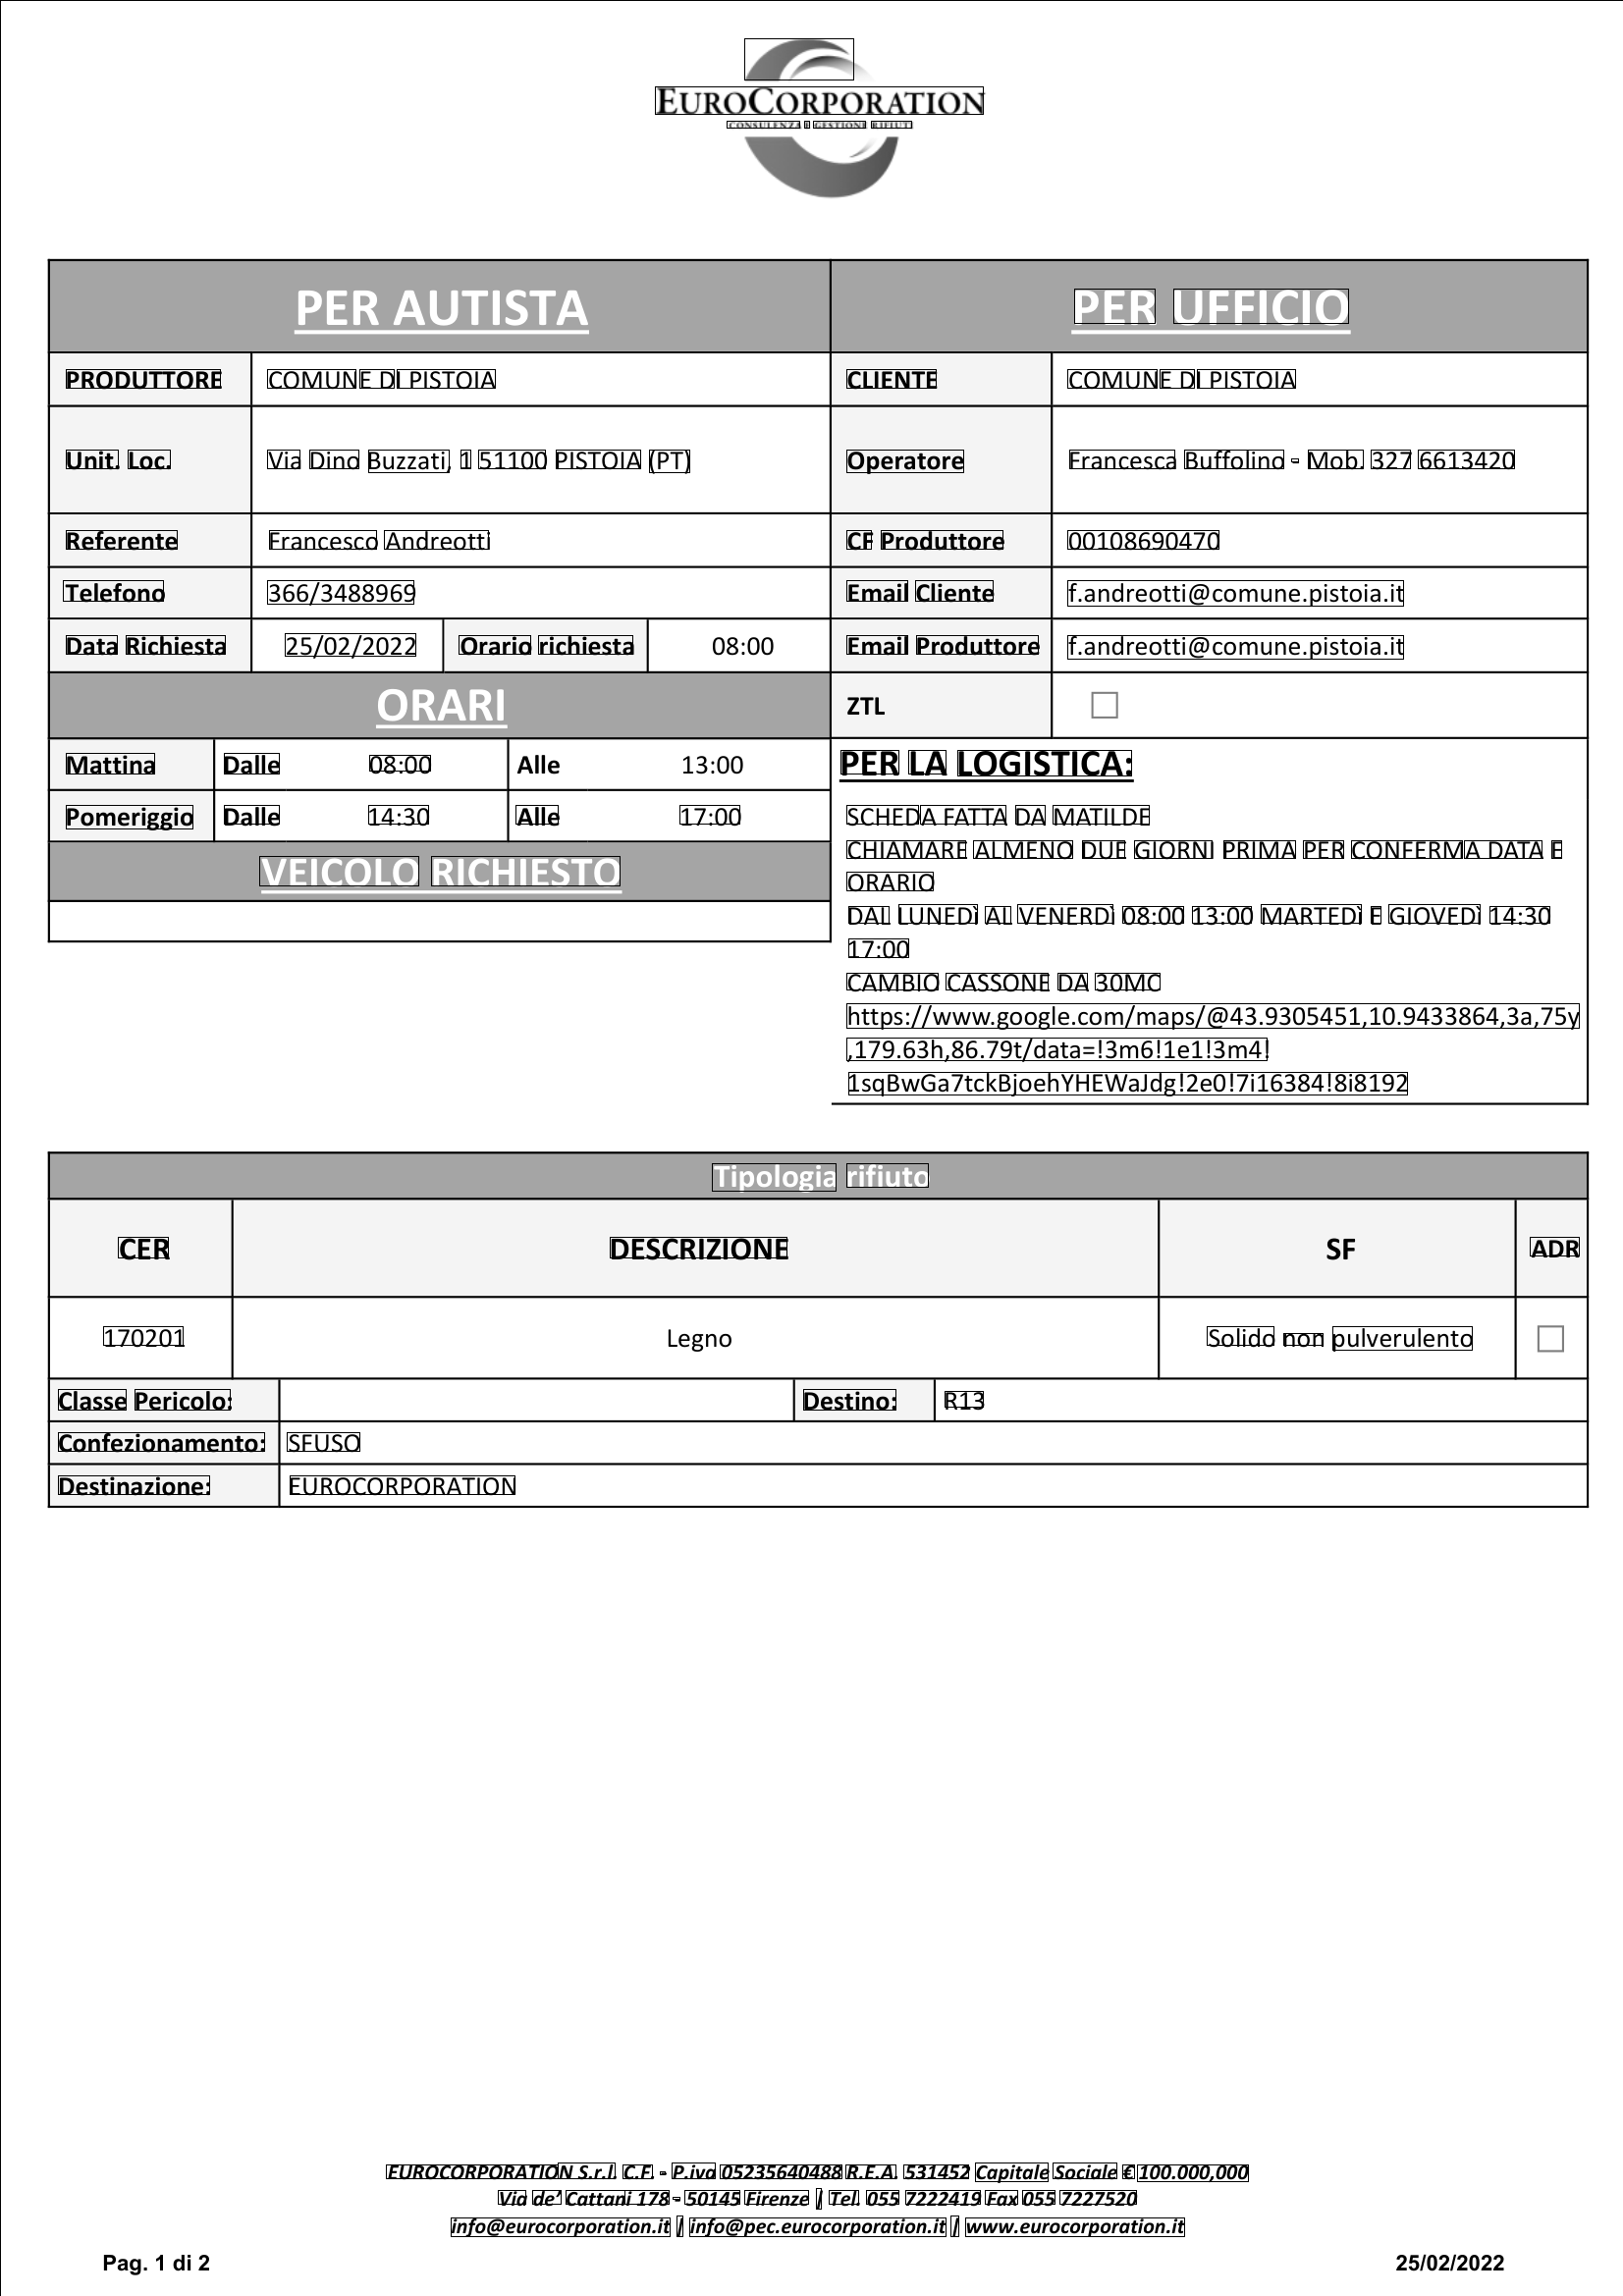

In [72]:
image = Image.open('/content/drive/Shareddrives/Data Science Team folder-open/dataset/test/img_dir/11.jpg').convert("L")
draw = ImageDraw.Draw(image)
for i in range(len(bbox)):
  outline_color = "black"
  draw.rectangle(((bbox[i][0],bbox[i][1]), (bbox[i][2],bbox[i][3])), outline = outline_color)
  # draw.text((b[0]+10, b[1]-10), text=t)
  # print(b,t)
image
  

### USing DBSCAN

In [19]:
def cal_center(bbox):
  center_bbox = []*len(bbox)
  for i in bbox:
    x = int((i[0]+i[2])/2)
    y = int((i[1]+i[3])/2)
    center_bbox.append([x,y])
  return center_bbox

In [ ]:
center_points

In [16]:
image.shape[:2]

(2339, 1653)

(-0.5, 1652.5, 2338.5, -0.5)

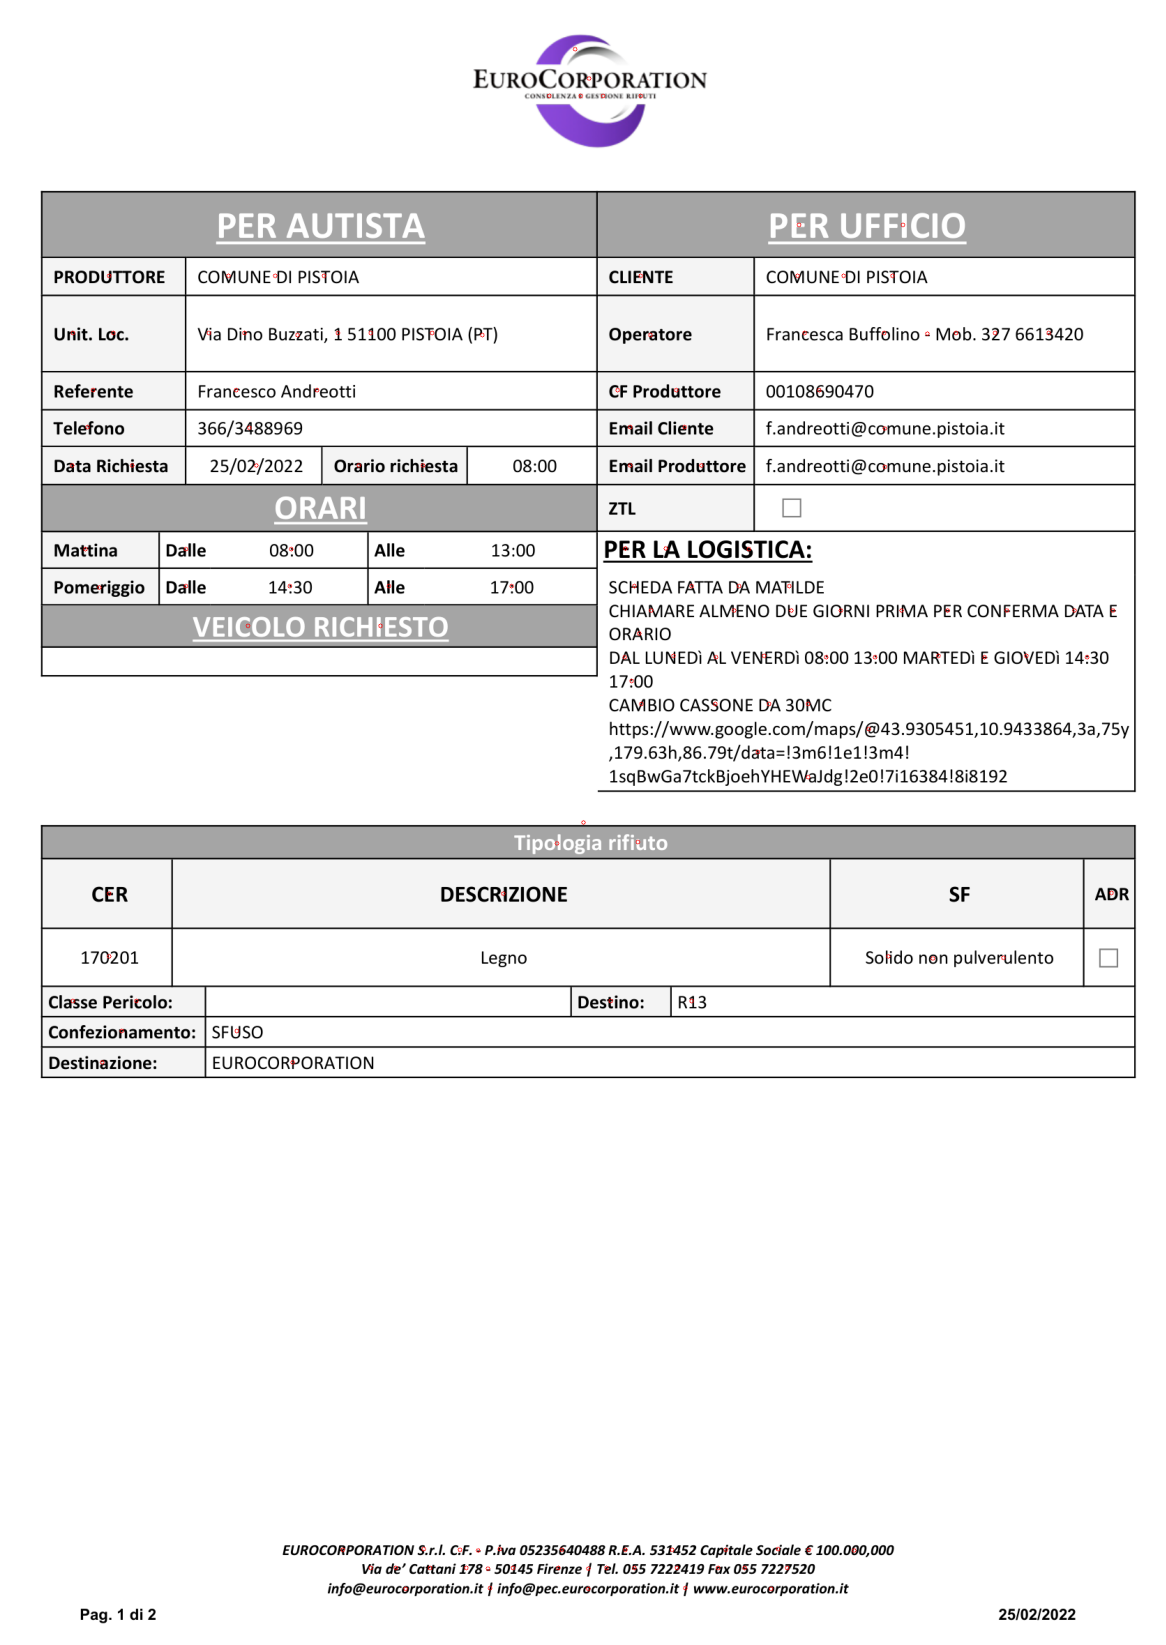

In [20]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN


image = cv2.imread('/content/drive/Shareddrives/Data Science Team folder-open/dataset/test/img_dir/11.jpg')
h, w= image.shape[:2]
white = np.zeros((h,w))
center_points = cal_center(bbox)
for point in center_points:
    x = int(point[0])
    y = int(point[1])
    img = cv2.circle(image, (x,y) , 3, (255,0,0))
    white = cv2.circle(white, (x,y) , 5, (255,255,255), 6)

plt.figure(figsize=(30,30))
plt.imshow(image)
plt.axis('off')

### Dilated box

In [6]:
# bbox - original bouding boxes
# pix - extra pixel to be added at the edges
def dilateBoxes(dilated_bbox, pix):
  newBox = dilated_bbox
  for i in newBox:
    i[0]-=pix
    # i[1]-=pix
    i[2]+=pix
    # i[3]+=pix
  return newBox

"""
return the indices of boxes in which given box occurs/overlaps
A: keeps all the boxes
B: is the individual box that needs to be tested
"""
def merge_Overlapping_boxes(A):
  updA = A
  track = [[]]*len(A)
  count = 0
  for i in range(len(A)):
    for multi in range(i, len(A)):
      # print("TARGET: ",A[i][2]-A[multi][2], abs(A[i][3]-A[multi][3]))
      if abs(A[i][2]-A[multi][2])<10 and abs(A[i][3]-A[multi][3])<10:
        track[i].append(multi)
        count+=1
      #   track[i] = [min(A[i][0],bbox[0]),
      #               min(A[i][1],bbox[1]),
      #               max(A[i][3],bbox[3]),
      #               max(A[i][4],bbox[4])]
      # # if A[i][2]-[0]>0 and abs(A[i][3]-B[3])<10:
      #   A[i][0] = min(A[i][0],bbox[0])
      #   A[i][1] = min(A[i][1],bbox[1])
      #   A[i][0] = max(A[i][3],bbox[3])
      #   A[i][0] = max(A[i][4],bbox[4])
  print(count)
  return track



In [53]:
t = merge_Overlapping_boxes(bbox)

160


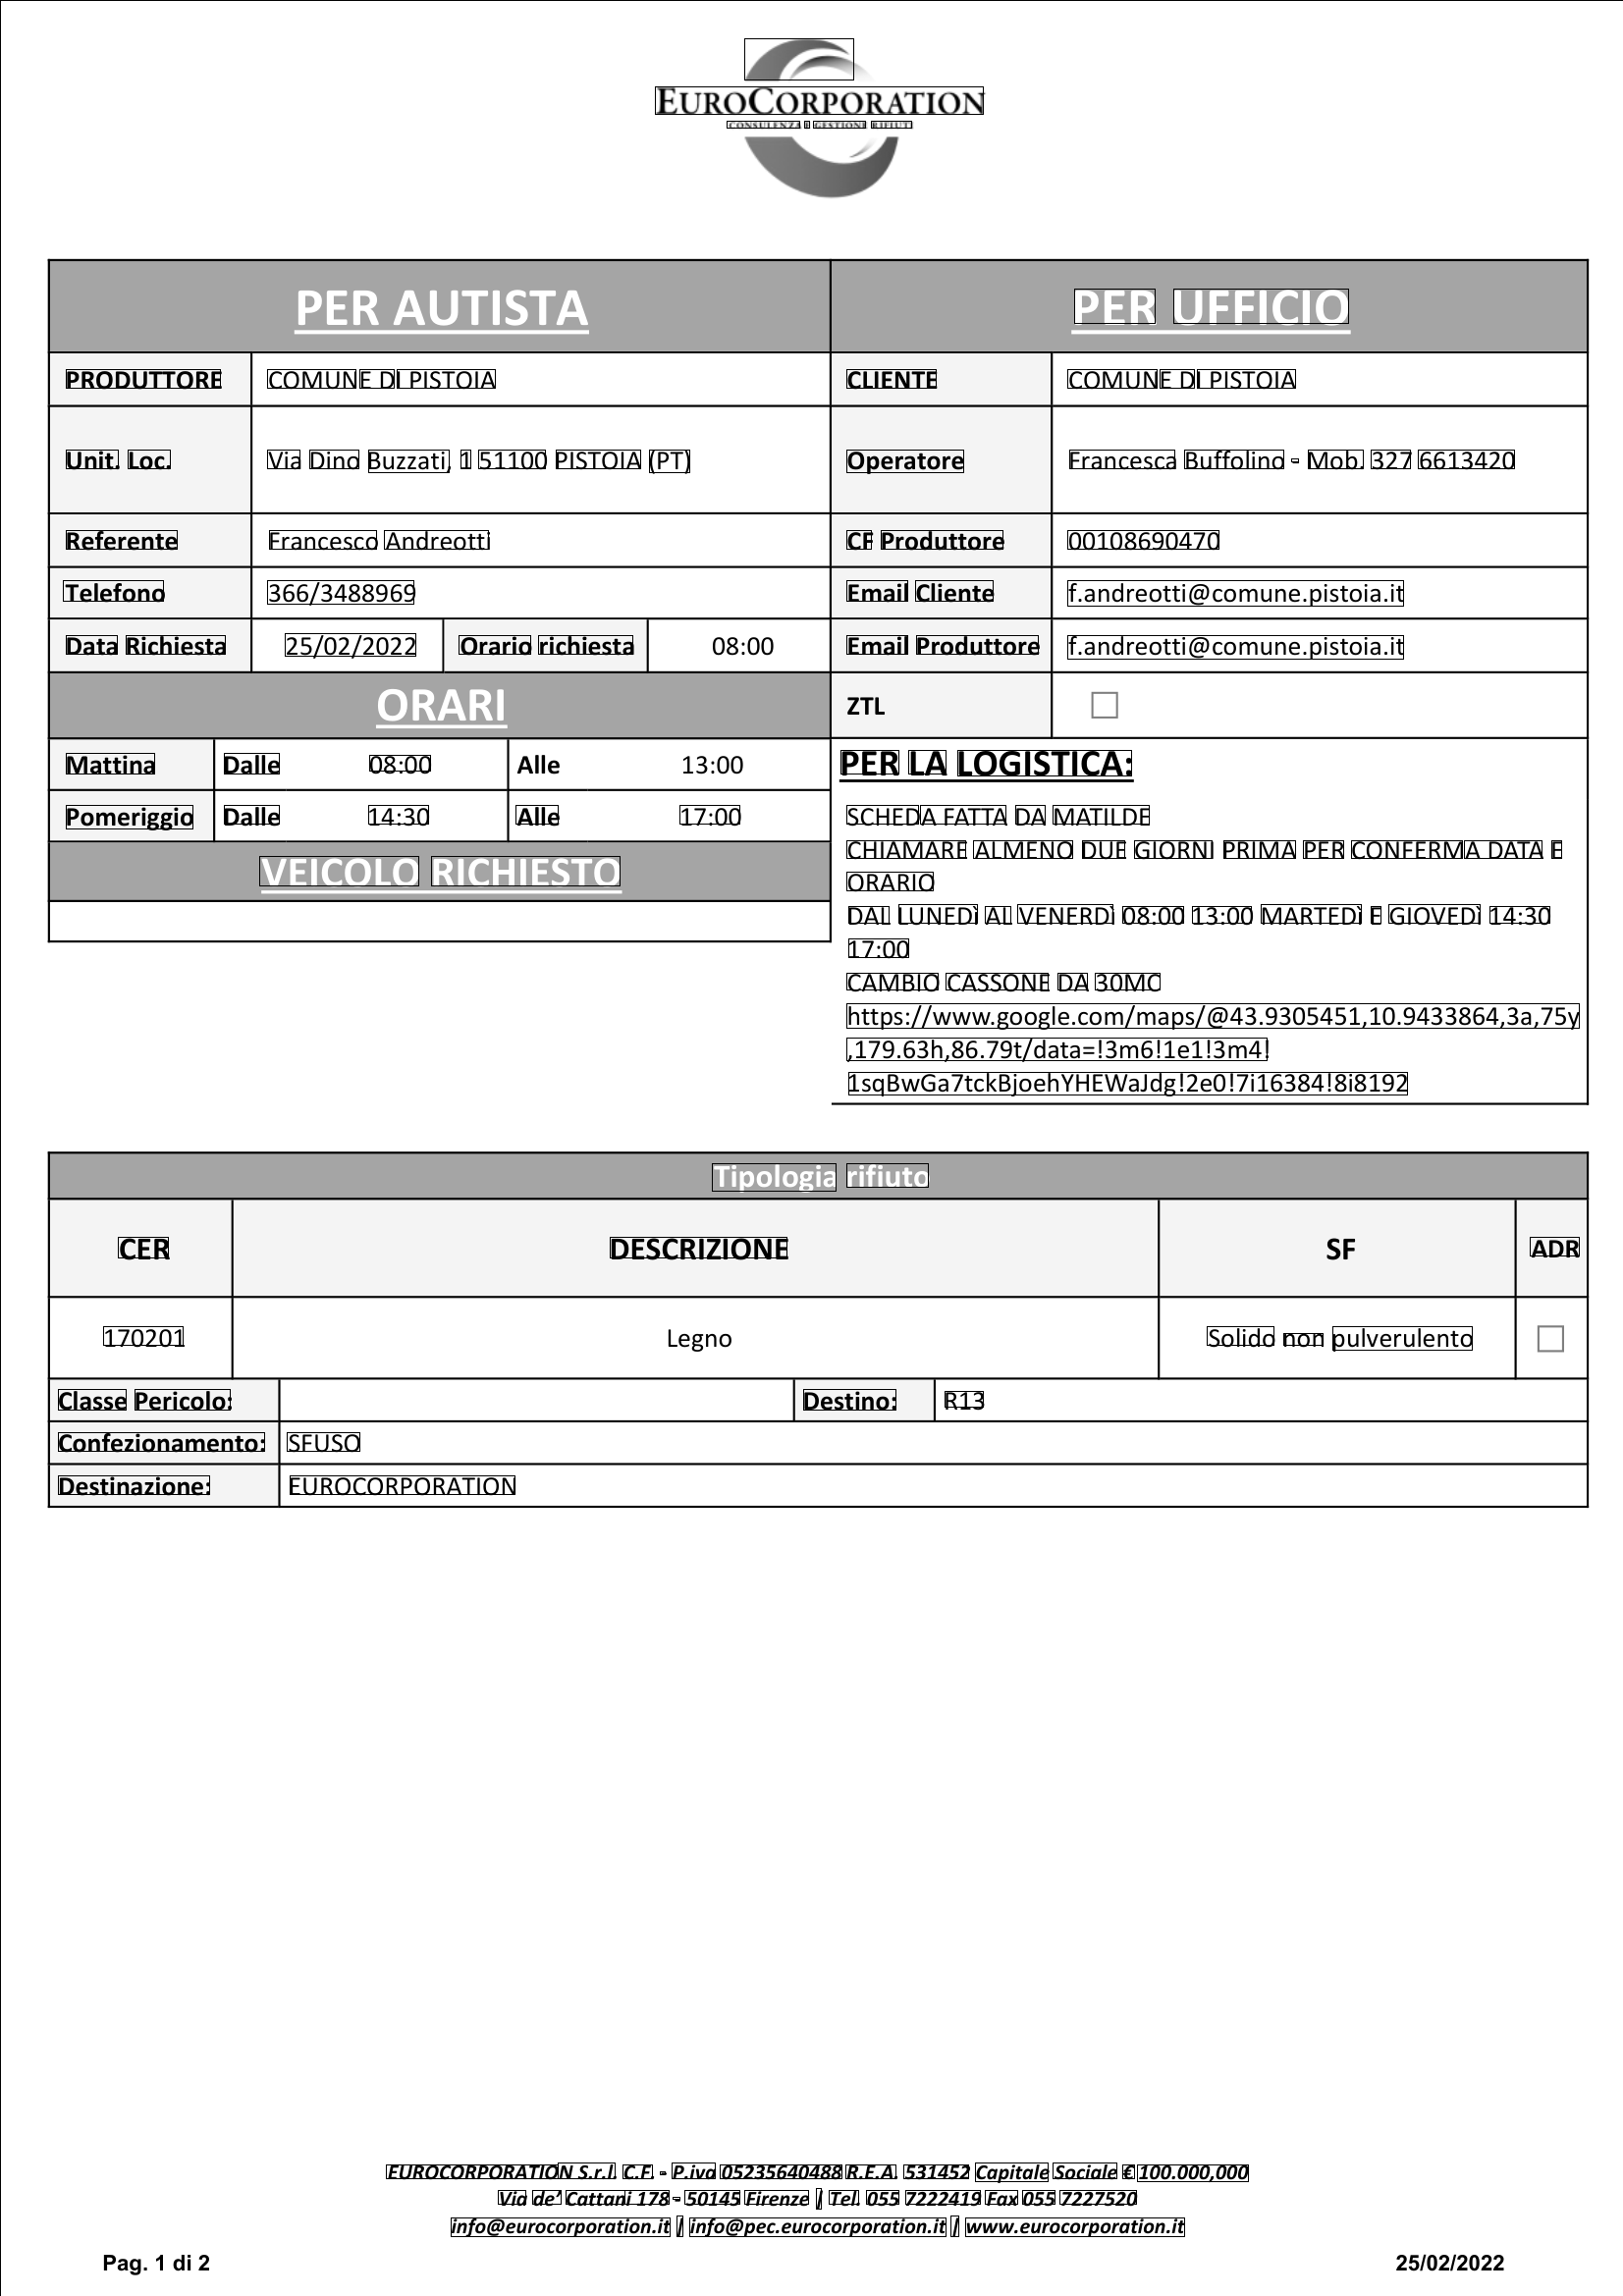

In [8]:
image = Image.open('/content/drive/Shareddrives/Data Science Team folder-open/dataset/test/img_dir/11.jpg').convert("L")
draw = ImageDraw.Draw(image)
track = []
d_bbox = dilateBoxes(bbox, 0)
for i in range(len(d_bbox)):
  outline_color = "black"
  draw.rectangle(((d_bbox[i][0],d_bbox[i][1]), (d_bbox[i][2],d_bbox[i][3])), outline = outline_color)
image

In [ ]:
merged_dbbox = merge_Overlapping_boxes(d_bbox)

In [11]:

draw.rectangle(bbox, outline=label2color[predicted_label])
# draw.text((box[0]+10, box[1]-10), text=predicted_label, fill=label2color[predicted_label], font=font)


[[758.727, 39.763000000000005, 869.4780000000001, 81.86500000000001],
 [667.812, 88.88199999999999, 1001.718, 116.95],
 [740.544, 123.967, 814.929, 130.984],
 [819.888, 123.967, 824.847, 130.984],
 [828.153, 123.967, 881.0490000000001, 130.984],
 [887.6610000000001, 123.967, 928.9860000000001, 130.984],
 [1094.286, 294.714, 1176.936, 329.799],
 [1195.119, 294.714, 1373.643, 329.799],
 [1087.674, 376.579, 1178.589, 395.29100000000005],
 [1181.895, 376.579, 1216.608, 395.29100000000005],
 [1219.914, 376.579, 1319.094, 395.29100000000005],
 [67.773, 376.579, 224.80800000000002, 395.29100000000005],
 [272.745, 376.579, 362.007, 395.29100000000005],
 [366.966, 376.579, 401.679, 395.29100000000005],
 [404.985, 376.579, 504.16499999999996, 395.29100000000005],
 [862.866, 376.579, 953.781, 395.29100000000005],
 [272.745, 458.444, 305.805, 477.15599999999995],
 [315.723, 458.444, 365.313, 477.15599999999995],
 [375.231, 458.444, 457.88100000000003, 481.83399999999995],
 [469.45199999999994, 458

In [3]:
import pandas as pd
len_data = len(df_main)
key_list =[]
value_list = []
for i in df_main:
    for k, v in i.items():
        if k == 'blue':
            key_list.append(v)
        if k == 'red':
            value_list.append(v)
print(len(key_list), key_list)
print(len(value_list), value_list)

df = pd.DataFrame({'blue': key_list[:12], 'red':value_list[:12]})
df

12 ['PRODUTTORE', 'CLIENTE', 'Unit. Loc. Operatore Referente', 'CF Produttore', 'Telefono Email Cliente', 'Data Richiesta', 'Orario richiesta Email Produttore', 'Mattina', 'Pomeriggio', 'CER DESCRIZIONE Classe Pericolo: Destino:', 'Confezionamento:', 'Destinazione:']
13 ['COMUNE DI PISTOIA', 'COMUNE DI PISTOIA', 'Via Dino Buzzati, 1 51100 PISTOIA (PT) Francesca Buffolino - Mob. 327 6613420', 'Francesco Andreotti', '00108690470', '366/3488969 f.andreotti@comune.pistoia.it', '25/02/2022', 'f.andreotti@comune.pistoia.it', 'Dalle 08:00', 'Alle 17:00', 'Dalle 14:30', 'R13', 'SFUSO EUROCORPORATION 170201 Solido non pulverulento']


,blue,red
0,PRODUTTORE,COMUNE DI PISTOIA
1,CLIENTE,COMUNE DI PISTOIA
2,Unit. Loc. Operatore Referente,"Via Dino Buzzati, 1 51100 PISTOIA (PT) Frances..."
3,CF Produttore,Francesco Andreotti
4,Telefono Email Cliente,00108690470
5,Data Richiesta,366/3488969 f.andreotti@comune.pistoia.it
6,Orario richiesta Email Produttore,25/02/2022
7,Mattina,f.andreotti@comune.pistoia.it
8,Pomeriggio,Dalle 08:00
9,CER DESCRIZIONE Classe Pericolo: Destino:,Alle 17:00


## Textual content correction

In [4]:

len_data = len(df_main)
key_list =[]
value_list = []
for i in df_main:
  print(i)
    # for k, v in i.items():
    #     if k == 'blue':
    #         key_list.append(v)
    #     if k == 'red':
    #         value_list.append(v)
# print(len(key_list), key_list)
# print(len(value_list), value_list)

# df = pd.DataFrame({'blue': key_list[:12], 'red':value_list[:12]})
# df

{'yellow': 'af EUROCORPORATION CONSULENZA E GESTIONE RIFLUTL PER UFFICIO'}
{'red': 'COMUNE DI PISTOIA'}
{'blue': 'PRODUTTORE'}
{'red': 'COMUNE DI PISTOIA'}
{'blue': 'CLIENTE'}
{'red': 'Via Dino Buzzati, 1 51100 PISTOIA (PT) Francesca Buffolino - Mob. 327 6613420'}
{'blue': 'Unit. Loc. Operatore Referente'}
{'red': 'Francesco Andreotti'}
{'blue': 'CF Produttore'}
{'red': '00108690470'}
{'blue': 'Telefono Email Cliente'}
{'red': '366/3488969 f.andreotti@comune.pistoia.it'}
{'blue': 'Data Richiesta'}
{'red': '25/02/2022'}
{'yellow': '|'}
{'blue': 'Orario richiesta Email Produttore'}
{'yellow': '|'}
{'red': 'f.andreotti@comune.pistoia.it'}
{'blue': 'Mattina'}
{'red': 'Dalle 08:00'}
{'yellow': 'PER LA LOGISTICA:'}
{'red': 'Alle 17:00'}
{'yellow': 'SCHEDA FATTA DA MATILDE CHIAMARE ALMENO DUE GIORNI PRIMA PER CONFERMA DATA E ORARIO DAL LUNEDi AL VENERDi 08:00 13:00 MARTEDi E GIOVEDi 14:30 17:00 CAMBIO CASSONE DA 30MC https://www.google.com/maps/@43.9305451,10.9433864,3a,75y ,179.63h,86.79t/da